Polynomial Regression and Clustering

In [7]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.cluster import KMeans
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [8]:
# making pandas dataframe
original_df = pd.read_csv('data.csv')

In [9]:
# creates a new dataframe with the selected columns
selected_columns = ['G3-2 R_cut = 8', 'G3-2 R_cut = 9', 'G3-2 R_cut = 7', 'G3-2 R_cut = 10', 'G3-1 R_cut = 7']
normalized_df = original_df[selected_columns]

# normalizes the values in the new dataframe
for column in selected_columns:
    min_val = np.min(normalized_df[column])
    max_val = np.max(normalized_df[column])
    normalized_df[column] = (normalized_df[column] - min_val) / (max_val - min_val)

normalized_df

/var/folders/60/s532ps5903l0qsmpztm3mhj80000gn/T/ipykernel_59048/142048656.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normalized_df[column] = (normalized_df[column] - min_val) / (max_val - min_val)


,G3-2 R_cut = 8,G3-2 R_cut = 9,G3-2 R_cut = 7,G3-2 R_cut = 10,G3-1 R_cut = 7
0,1.252691e-16,0.000000e+00,0.000000e+00,1.224182e-16,1.000000
1,6.419210e-01,6.397179e-01,5.949944e-01,6.074495e-01,0.365642
2,9.727670e-01,8.788642e-01,1.000000e+00,7.428985e-01,0.236012
3,8.876836e-01,8.421444e-01,8.742817e-01,7.590916e-01,0.214211
4,3.077067e-01,3.245302e-01,2.608861e-01,3.237935e-01,0.644513
...,...,...,...,...,...
95,3.077067e-01,3.245302e-01,2.608861e-01,3.237935e-01,0.644513
96,8.876836e-01,8.421444e-01,8.742817e-01,7.590916e-01,0.214211
97,9.727670e-01,8.788642e-01,1.000000e+00,7.428985e-01,0.236012
98,6.419210e-01,6.397179e-01,5.949944e-01,6.074495e-01,0.365642


# Polynomial Regression

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error

X = normalized_df
y = original_df['SCFshift']

_degree = 5
algorithm = 'ridge_regression'

n = len(X)
train_sizes = range(1, n)
mae_scores = []
mse_scores = []

for train_size in train_sizes:
    random_state = 42 
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=random_state)

    poly_features = PolynomialFeatures(degree=_degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    ridge_regression_model = LinearRegression()  # Regularization to prevent overfitting
    ridge_regression_model.fit(X_train_poly, y_train)

    y_pred = ridge_regression_model.predict(X_test_poly)

    mae_score = mean_absolute_error(y_test, y_pred)
    mse_score = mean_squared_error(y_test, y_pred)
    
    mae_scores.append(mae_score)
    mse_scores.append(mse_score)

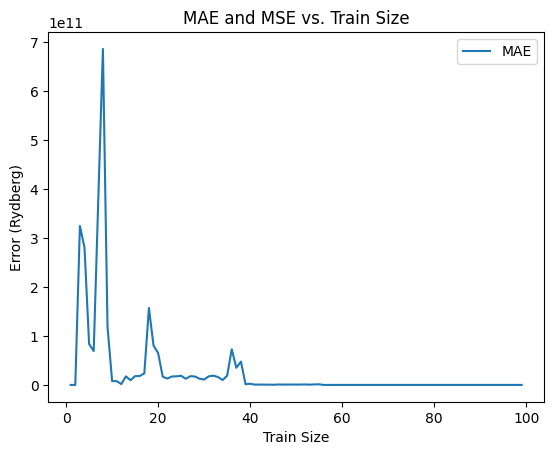

In [21]:

plt.plot(list(train_sizes), mae_scores, label='MAE')
# plt.plot(list(train_sizes), mse_scores, label='MSE')
plt.xlabel('Train Size')
plt.ylabel('Error (Rydberg)')
plt.title('MAE and MSE vs. Train Size')
plt.legend()
plt.show()

# Lasso Regression

In [12]:
lasso_X_vector_df = normalized_df

lasso_y_vector_df = original_df['SCFshift']

lasso_reg = Lasso(alpha=1)

lasso_reg.fit(X_lasso_train, y_lasso_train)

Lasso(alpha=1)

# Clustering

In [13]:
import warnings
warnings.filterwarnings("ignore")

In [14]:
def calculate_clusters(df, n_clusters):
    points = df.values
    kmeans = KMeans(n_clusters=n_clusters)
    labels = kmeans.fit_predict(points)
    centroids = kmeans.cluster_centers_
    return labels, points, centroids, kmeans

In [15]:
def regression_model(X_vector, y_value, _degree):
    # training our model on our cluster centroids and their corresponding SCFshift values
    X_train = X_vector
    y_train = y_value
    
    X_test = normalized_df[~normalized_df.isin(X_train)].dropna()
    y_test = original_df['SCFshift'].to_frame()[~original_df['SCFshift'].to_frame().isin(y_train)].dropna()
    
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=_degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    # Create and train the polynomial regression model
    poly_regression_model = LinearRegression()
    poly_regression_model.fit(X_train_poly, y_train)

    # Generate predictions for the test dataset
    y_pred = poly_regression_model.predict(X_test_poly)

    # Calculate reliability score (R-squared)
    mean_error = mean_absolute_error(y_test, y_pred)

    # Print the results
    return mean_error


In [16]:
# Initialize lists to store cluster values and corresponding errors
cluster_values = []
mae_values = []
mse_values = []

# Iterate over different values of the number of clusters
for num_clusters in range(2, 16):
    labels, points, centroids, kmeans = calculate_clusters(normalized_df, num_clusters)

    # Get the indices of the closest points to the centroids
    closest_indices = [np.argmin([np.linalg.norm(point - centroid) for point in points]) for centroid in centroids]

    # Get the corresponding variables of the closest points
    closest_points = normalized_df.iloc[closest_indices]

    # Create a DataFrame with the closest points
    closest_vector_df = pd.DataFrame(closest_points, columns=normalized_df.columns)

    # Get the corresponding values of the closest SCF
    closest_scf = original_df.iloc[:, 3].iloc[closest_indices]

    # Create a DataFrame with the closest SCF
    closest_scf_df = closest_scf.to_frame()

    # Call the regression model function
    error = regression_model(closest_vector_df, closest_scf_df, num_clusters)

    # Calculate the Mean Absolute Error (MAE)
    mae = np.abs(error).mean()

    # Calculate the Mean Squared Error (MSE)
    mse = np.square(error).mean()

    # Append the cluster value, MAE, and MSE to the respective lists
    cluster_values.append(num_clusters)
    mae_values.append(mae)
    mse_values.append(mse)


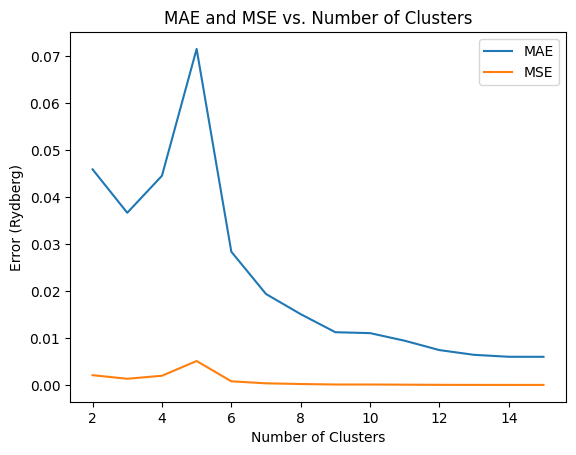

In [17]:
# Plotting the MAE and MSE values
plt.plot(cluster_values, mae_values, label='MAE')
plt.plot(cluster_values, mse_values, label='MSE')
plt.xlabel('Number of Clusters')
plt.ylabel('Error (Rydberg)')
plt.title('MAE and MSE vs. Number of Clusters')
plt.legend()
plt.show()
